In [1]:
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [2]:
# Import our input dataset
wine_df = pd.read_csv('C:/Users/Yady/MIA-VIRT-DATA-PT-11-2022-U-B/FINAL PROJECT/winemag-data_first150k.csv',index_col= 'Unnamed: 0')

In [3]:
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
#Fill NA/NaN values on the column region_2 with value 'None'.
wine_df['region_2'] = wine_df['region_2'].fillna('None')

In [5]:
#Count the region_1 values we have in our dataframe.
region_counts = wine_df.region_1.value_counts()
region_counts

Napa Valley                  6209
Columbia Valley (WA)         4975
Mendoza                      3586
Russian River Valley         3571
California                   3462
                             ... 
Alpilles                        1
Vin de Pays de Hauterive        1
Santa Barbara-Monterey          1
Sonoma County-Lake County       1
Coteaux du Tricastin            1
Name: region_1, Length: 1236, dtype: int64

<AxesSubplot:ylabel='Density'>

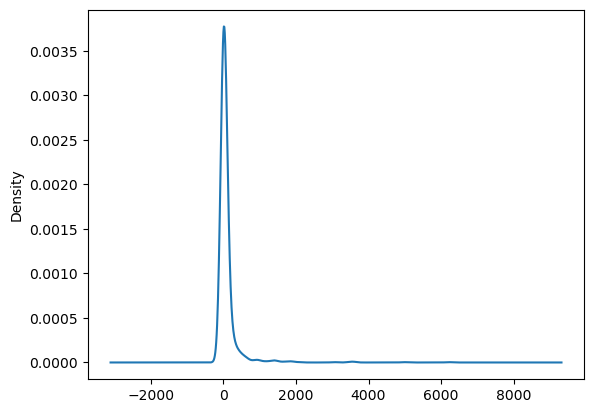

In [6]:
#Visualizing the region counts,
region_counts.plot.density()

In [7]:
#Stats for the region_1
region_counts.describe()

count    1236.00000
mean      101.83657
std       364.95702
min         1.00000
25%         4.00000
50%        12.50000
75%        58.00000
max      6209.00000
Name: region_1, dtype: float64

In [8]:
#List all the region_1 under a frequency of 500 to group them into a new category named "Other".

replace_region = list(region_counts[region_counts < 500].index)
replace_region

['Monterey County',
 'Alto Adige',
 'South Eastern Australia',
 'Barossa Valley',
 'Margaux',
 'Amador County',
 'Rías Baixas',
 'Mendocino',
 'Mendocino County',
 'Dundee Hills',
 'Colli Orientali del Friuli',
 'South Australia',
 'Oakville',
 'Oregon',
 'Sierra Foothills',
 'Franciacorta',
 'Haut-Médoc',
 'Conegliano Valdobbiadene Prosecco Superiore',
 'Virginia',
 'Livermore Valley',
 'Bordeaux Blanc',
 'Wahluke Slope',
 'Navarra',
 'Lake County',
 'Rueda',
 'Bolgheri',
 "Barbera d'Alba",
 'Pauillac',
 'Bordeaux',
 'Barossa',
 'North Coast',
 'Médoc',
 'Priorat',
 'Vino de la Tierra de Castilla',
 'Pomerol',
 "Vin de Pays d'Oc",
 'Uco Valley',
 'Valpolicella Superiore Ripasso',
 'Toro',
 'Bourgogne',
 'Sauternes',
 'Arroyo Seco',
 'Luján de Cuyo',
 'Rogue Valley',
 "Barbera d'Asti",
 'Howell Mountain',
 'Meursault',
 'Valpolicella Classico Superiore Ripasso',
 'Clare Valley',
 'Chehalem Mountains',
 'Rosso di Montalcino',
 'El Dorado',
 "Montepulciano d'Abruzzo",
 'Saint-Estèphe',
 

In [9]:
for i in replace_region:
    wine_df.region_1 = wine_df.region_1.replace(i,"Other")

region_counts = wine_df.region_1.value_counts()



<AxesSubplot:ylabel='Density'>

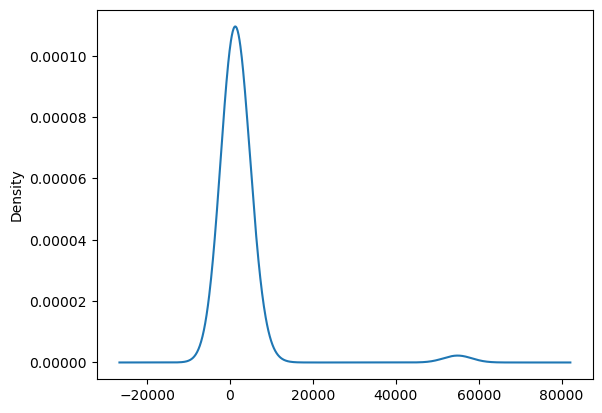

In [10]:
#Plot region data after grouping in category "Other".
region_counts.plot.density()

In [11]:
#Counting the values we have in the "Winery column".
winery_counts=wine_df.winery.value_counts()
winery_counts

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
                        ... 
Republic of Wine           1
Prince Michel              1
Glass House                1
Jones von Drehle           1
White Knot                 1
Name: winery, Length: 14810, dtype: int64

<AxesSubplot:ylabel='Density'>

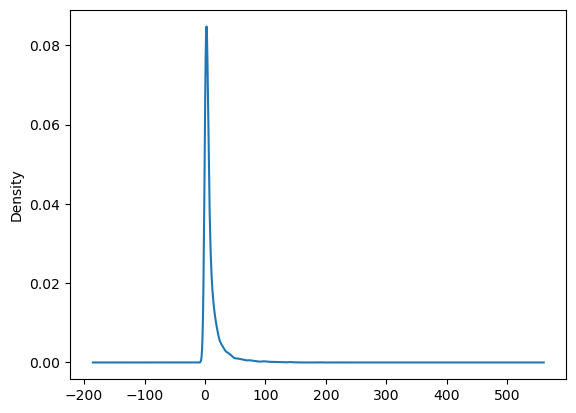

In [12]:
#Plot winery data.
winery_counts.plot.density()

In [13]:
#Stats for winery column.
winery_counts.describe()

count    14810.000000
mean        10.191087
std         17.359978
min          1.000000
25%          2.000000
50%          4.000000
75%         11.000000
max        374.000000
Name: winery, dtype: float64

In [14]:
#List all the wineries with a frequency of 30 or less to group them into a new category named "Other".
replace_winery = list(winery_counts[winery_counts < 30].index)
replace_winery

['Claiborne & Churchill',
 'BOND',
 'Hawley',
 'Winderlea',
 'Merriam',
 'William Cole',
 'Argiano',
 'Peters Family',
 'Allegrini',
 'San Rustico',
 'Drappier',
 "Masies d'Avinyo",
 'Francis Coppola',
 'Máté',
 'Belle Glos',
 'Ruca Malen',
 'Davis Bynum',
 'Fiuza',
 'Belhurst',
 'Lincourt',
 'Clos Troteligotte',
 'Souverain',
 'Lone Canary',
 'Shingleback',
 'Ruggeri & C.',
 'Villa Mt. Eden',
 'Rivetto',
 'Tapestry',
 'West Cape Howe',
 'Sextant',
 'St. Clement',
 'Domaine Pouillon',
 'Qupé',
 'Gordon Brothers',
 'Warwick',
 'Casa do Valle',
 'Escarpment',
 'Kana',
 'Poggio Nardone',
 'Adega Cooperativa do Cartaxo',
 'Seven of Hearts',
 'Nobilo',
 'Gritsch Mauritiushof',
 'Sella & Mosca',
 'Cloudy Bay',
 'Desert Wind',
 'Cowhorn',
 'Christian Lazo',
 'Bergevin Lane',
 'Castello di Poppiano',
 'Rieflé',
 'Oak Knoll',
 'Corley',
 'Stephen & Walker',
 'Setzer',
 "Osprey's Dominion",
 'Alvaro Castro',
 'Condado de Oriza',
 'Valdo',
 'Bota Box',
 'Château Malartic-Lagravière',
 "Quinta de 

In [15]:
for i in replace_winery:
    wine_df.winery = wine_df.winery.replace(i,"Other")

winery_counts = wine_df.winery.value_counts()

In [16]:
#Counting the values we have in the "Winery column" after regrouping.
winery_counts

Other                         84915
Williams Selyem                 374
Testarossa                      274
DFJ Vinhos                      258
Chateau Ste. Michelle           225
                              ...  
Parkers Estate                   30
Borra                            30
Hobo                             30
Château Smith Haut Lafitte       30
Palivou                          30
Name: winery, Length: 1172, dtype: int64

In [17]:
#Removing missing values in the dataframe.
wine_df.dropna(inplace=True)
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Other
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Other,None,Tinta de Toro,Other
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Other,Sonoma,Sauvignon Blanc,Other
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Other,None,Provence red blend,Other
...,...,...,...,...,...,...,...,...,...,...
150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,None,Champagne Blend,Other
150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,None,Champagne Blend,Other
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,None,Champagne Blend,Other
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Other,None,White Blend,Terredora


In [18]:
description_split = wine_df.loc[:,"description"]
description_split


0         This tremendous 100% varietal wine hails from ...
1         Ripe aromas of fig, blackberry and cassis are ...
2         Mac Watson honors the memory of a wine once ma...
3         This spent 20 months in 30% new French oak, an...
4         This is the top wine from La Bégude, named aft...
                                ...                        
150923    Rich and toasty, with tiny bubbles. The bouque...
150924    Really fine for a low-acid vintage, there's an...
150926    Offers an intriguing nose with ginger, lime an...
150927    This classic example comes from a cru vineyard...
150928    A perfect salmon shade, with scents of peaches...
Name: description, Length: 77284, dtype: object

In [26]:
new = wine_df["description"].str.split(" ", n = 100, expand = True)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,This,tremendous,100%,varietal,wine,hails,from,Oakville,and,was,...,None,None,None,None,None,None,None,None,None,None
1,Ripe,aromas,of,"fig,",blackberry,and,cassis,are,softened,and,...,None,None,None,None,None,None,None,None,None,None
2,Mac,Watson,honors,the,memory,of,a,wine,once,made,...,None,None,None,None,None,None,None,None,None,None
3,This,spent,20,months,in,30%,new,French,"oak,",and,...,None,None,None,None,None,None,None,None,None,None
4,This,is,the,top,wine,from,La,"Bégude,",named,after,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150923,Rich,and,"toasty,",with,tiny,bubbles.,The,bouquet,is,laced,...,None,None,None,None,None,None,None,None,None,None
150924,Really,fine,for,a,low-acid,"vintage,",there's,an,intriguing,nose,...,None,None,None,None,None,None,None,None,None,None
150926,Offers,an,intriguing,nose,with,"ginger,",lime,and,floral,elements.,...,None,None,None,None,None,None,None,None,None,None
150927,This,classic,example,comes,from,a,cru,vineyard,called,Terre,...,None,None,None,None,None,None,None,None,None,None


In [29]:
new["Number of Words"] = wine_df["description"].apply(lambda n: len(n.split()))
new["Number of Words"].describe()

count    77284.000000
mean        41.754697
std         12.018681
min          3.000000
25%         34.000000
50%         41.000000
75%         49.000000
max        135.000000
Name: Number of Words, dtype: float64

In [30]:
new = wine_df["description"].str.split(" ", n = 45, expand = True)
new

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,This,tremendous,100%,varietal,wine,hails,from,Oakville,and,was,...,minty,tone,in,the,background.,Balanced,and,rewarding,from,"start to finish, it has years ahead of it to d..."
1,Ripe,aromas,of,"fig,",blackberry,and,cassis,are,softened,and,...,and,baking,spices.,A,"toasty,",everlasting,finish,is,heady,but ideally balanced. Drink through 2023.
2,Mac,Watson,honors,the,memory,of,a,wine,once,made,...,reveling,in,the,succulence,of,its,122,g/L,of,residual sugar.
3,This,spent,20,months,in,30%,new,French,"oak,",and,...,black,"cherry,",coffee,and,graphite.,Tannins,are,polished,to,"a fine sheen, and frame a finish loaded with d..."
4,This,is,the,top,wine,from,La,"Bégude,",named,after,...,the,wine,has,developing,an,extra,richness,and,concentration.,"Produced by the Tari family, formerly of Châte..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150923,Rich,and,"toasty,",with,tiny,bubbles.,The,bouquet,is,laced,...,slightly,"oxidized,",nutty,finish.,This,would,work,perfectly,with,"the usual Champagne food suspects: foie gras, ..."
150924,Really,fine,for,a,low-acid,"vintage,",there's,an,intriguing,nose,...,lovely.,This,well-developed,example,still,has,youthful,"elements,",and,closes with a grapefruit-mineral finish that i...
150926,Offers,an,intriguing,nose,with,"ginger,",lime,and,floral,elements.,...,and,lime,on,the,palate.,Finishes,"nicely,",too.,None,None
150927,This,classic,example,comes,from,a,cru,vineyard,called,Terre,...,On,the,"palate,",the,structure,and,mouthfeel,are,nearly,perfect. The finish features the butterscotch ...


In [34]:
dict = new.to_dict()
print(dict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

